In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("health.csv")
df.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [2]:
df
print("no.of rows", df.shape[0])
print("no.of columns", df.shape[1])


no.of rows 15000
no.of columns 13


In [3]:
#checking the null values in the data
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [4]:
#taking mean of age and bmi columns as many null values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
null_values=['age', 'bmi']
df[null_values]=imputer.fit_transform(df[null_values])
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [5]:
print("no.of rows", df.shape[0])
print("no.of colums",df.shape[1])

no.of rows 15000
no.of colums 13


In [6]:
df.describe(include='all')

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,2,NaN,NaN,10,NaN,NaN,91,NaN,NaN,NaN,35,NaN
top,NaN,female,NaN,NaN,NoDisease,NaN,NaN,NewOrleans,NaN,NaN,NaN,Student,NaN
freq,NaN,7652,NaN,NaN,13998,NaN,NaN,302,NaN,NaN,NaN,1320,NaN
mean,39.547521,NaN,64.909600,30.266413,NaN,1.129733,0.198133,NaN,68.650133,0.777000,0.224133,NaN,13401.437620
std,13.829705,NaN,13.701935,5.924606,NaN,1.228469,0.398606,NaN,19.418515,0.416272,0.417024,NaN,12148.239619
min,18.000000,NaN,34.000000,16.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1121.900000
25%,27.000000,NaN,54.000000,25.900000,NaN,0.000000,0.000000,NaN,64.000000,1.000000,0.000000,NaN,4846.900000
50%,40.000000,NaN,63.000000,29.800000,NaN,1.000000,0.000000,NaN,71.000000,1.000000,0.000000,NaN,9545.650000
75%,51.000000,NaN,76.000000,34.100000,NaN,2.000000,0.000000,NaN,80.000000,1.000000,0.000000,NaN,16519.125000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [8]:
#converting object format to float or integer in 0 or 1
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [9]:
df["sex"]=df["sex"].map({'female':0, 'male':1})
df["sex"].unique

<bound method Series.unique of 0        1
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: sex, Length: 15000, dtype: int64>

In [10]:
df["hereditary_diseases"].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [11]:
df["hereditary_diseases"]=df["hereditary_diseases"].map({'NoDisease':0, 'Epilepsy':1, 'EyeDisease':2, 'Alzheimer':3, 'Arthritis':4,
       'HeartDisease':5, 'Diabetes':6, 'Cancer':7, 'High BP':8, 'Obesity':9})
df["hereditary_diseases"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
df["city"].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['city'].unique()

array([55,  5, 63, 64,  8,  1, 65,  9, 29, 79, 81,  3, 89, 83, 85, 86, 67,
       28, 56, 80, 88,  0,  6, 12, 13, 42, 47, 53, 54, 68, 30, 26, 58, 59,
       44, 31, 38, 24, 49, 82, 61, 37, 46, 45, 87, 33, 17, 32, 15,  4, 71,
       35,  7, 51, 14, 40, 22, 27, 23, 16, 10, 18, 70, 50, 34, 20, 90, 77,
       21, 73, 74, 41, 60, 72, 57, 11, 52, 66, 25, 69, 39, 84, 75, 19, 36,
        2, 48, 78, 62, 76, 43])

In [14]:
df['job_title'].unique()

array([ 2, 16,  0, 10, 22, 12, 32, 13, 30, 33, 15, 28, 29,  5,  8,  6,  9,
       26,  1, 19, 34, 18,  4, 23, 20,  7, 31, 14,  3, 11, 24, 17, 25, 27,
       21])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int32  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int32  
 12  claim                15000 non-null  float64
dtypes: float64(3), int32(2), int64(8)
memory usage: 1.4 MB


In [16]:
#setting feature and target columns
x=df.drop(['claim'],axis=1)
y=df['claim']

In [17]:
x.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,0,1,0,55,72,0,0,2
1,49.0,0,75,22.6,0,1,0,5,78,1,1,16
2,32.0,0,64,17.8,1,2,1,63,88,1,1,0
3,61.0,0,53,36.4,0,1,1,64,72,1,0,10
4,19.0,0,50,20.6,0,0,0,8,82,1,0,22


In [18]:
y.head()

0    13112.6
1     9567.0
2    32734.2
3    48517.6
4     1731.7
Name: claim, dtype: float64

In [19]:
#train & split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
y_train[0]

13112.6

In [21]:
#importing regression algorithms
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR  
from sklearn.ensemble import GradientBoostingRegressor 

In [36]:
#train the linear model
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
#train svr model
svm=SVR()
svm.fit(X_train, y_train)

SVR()

In [24]:
ran=RandomForestRegressor()
ran.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
gr=GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [26]:
#predicting each model on test data
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=ran.predict(X_test)
y_pred4=gr.predict(X_test)

In [37]:
#comparing actual and predicted values
df1 = pd.DataFrame({'Actual': y_test, 'LR': y_pred1, 'SVR': y_pred2, 'RF': y_pred3, 'GR': y_pred4})
df1

,Actual,LR,SVR,RF,GR
11499,8835.3,12682.416045,9474.125363,8835.300,10165.152071
6475,2134.9,925.146282,9047.537556,2363.109,3040.179034
13167,5148.6,7011.110666,9245.985167,5148.600,5163.613637
862,10704.5,11868.577020,9569.318628,10744.958,12409.145977
5970,4260.7,5908.251384,9272.803219,4260.700,6091.596257
...,...,...,...,...,...
6216,12032.3,8793.573426,9601.785410,12021.906,12643.647667
3585,11658.4,12223.322920,9592.051905,11658.400,12011.727068
10023,11085.6,12919.730363,9458.428303,11085.600,10375.943543
14044,2166.7,3771.385204,9087.881728,2166.700,3591.910234


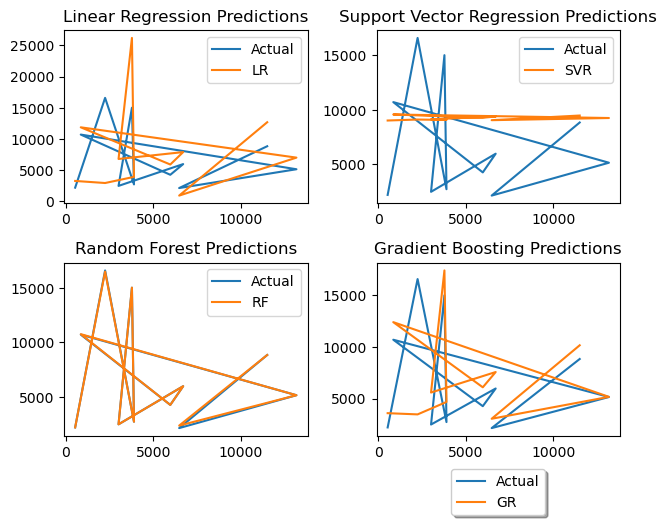

In [28]:
#graph results
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['LR'].iloc[0:11], label="LR")
plt.legend()
plt.title('Linear Regression Predictions')

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['SVR'].iloc[0:11], label="SVR")
plt.legend()
plt.title('Support Vector Regression Predictions')

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['RF'].iloc[0:11], label="RF")
plt.legend()
plt.title('Random Forest Predictions')

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11], label='Actual')
plt.plot(df1['GR'].iloc[0:11], label="GR")
plt.title('Gradient Boosting Predictions')

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

In [29]:
from sklearn import metrics
# Calculate and store the R-squared (R2) score for the Linear Regression (lr) model
lr_r2_score = metrics.r2_score(y_test, y_pred1)

svm_r2_score = metrics.r2_score(y_test, y_pred2)

rf_r2_score = metrics.r2_score(y_test, y_pred3)

gr_r2_score = metrics.r2_score(y_test, y_pred4)

# Print R-squared (R2) scores for each model
print("R-squared Score for Linear Regression (LR):", lr_r2_score)
print("R-squared Score for Support Vector Regression (SVR):", svm_r2_score)
print("R-squared Score for Random Forest Regressor (RF):", rf_r2_score)
print("R-squared Score for Gradient Boosting Regressor (GR):", gr_r2_score)

R-squared Score for Linear Regression (LR): 0.7490864602549504
R-squared Score for Support Vector Regression (SVR): -0.10367227528667633
R-squared Score for Random Forest Regressor (RF): 0.9666313179902359
R-squared Score for Gradient Boosting Regressor (GR): 0.863491317911714


In [30]:
#calculate the mean absolute error for the models
mae_lr = metrics.mean_absolute_error(y_test, y_pred1)
mae_svr = metrics.mean_absolute_error(y_test, y_pred2)
mae_ran = metrics.mean_absolute_error(y_test, y_pred3)
mae_gr = metrics.mean_absolute_error(y_test, y_pred4)

In [31]:
print("MAE for Linear Regression (LR):", mae_lr)
print("MAE for Support Vector Regression (SVR):", mae_svr)
print("MAE for Random Forest Regressor (RF):", mae_ran)
print("MAE for Gradient Boosting Regressor (GR):", mae_gr)

MAE for Linear Regression (LR): 4071.7252365684776
MAE for Support Vector Regression (SVR): 8291.201612038634
MAE for Random Forest Regressor (RF): 454.76599633334183
MAE for Gradient Boosting Regressor (GR): 2665.1068530829884


In [32]:
#prediction for new customer
new_df = pd.DataFrame(X_train,index=[0])
new_df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60.0,1,64,24.3,0,1,0,55,72,0,0,2


In [33]:
new_pred=gr.predict(new_df)
print("medical insurance cost for new customer is:", new_pred[0])

medical insurance cost for new customer is: 15776.391084431612


In [34]:
new_pred_ran=ran.predict(new_df)
print("Medical Insurance cost for New Customer (Random Forest Regressor) is:", new_pred_ran[0])

Medical Insurance cost for New Customer (Random Forest Regressor) is: 13112.600000000008


In [35]:
y_train[0]

13112.6